# Life Expectancy predictor
## WHO data and a DM<sup>3</sup> project

### Accessing Data

In [ ]:
# import useful libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load the dataset
path = 'Life Expectancy Data.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)

### Data Overview

In [ ]:
# check the first couple of rows
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [ ]:
# check the last couple of rows
df.tail()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8
2863,Iceland,Rest of Europe,2011,2.1,2.6,50.5745,6.840,88,90,26.1,95,95,0.05,48934,0.32,0.9,0.9,11.0,1,0,82.4


In [ ]:
# check the size of the dataframe
df.shape

(2864, 21)

In [ ]:
# check for duplicate records
df.duplicated().sum()

0

### Exploratory Data Analysis

In [ ]:
# check statistics
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


**Things to note:**

Big difference in mix/max on:
- Infant_deaths
     - Under_five_deaths
     - Adult_mortality
     - Alcohol_consumption
     - Polio
     - Diphtheria
     - Incidents_HIV
     - GDP_per_capita
     - Thinness_ten_nineteen_years
     - Thinness_five_nine_years
     - Schooling


In [ ]:
# check columns, data types and null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
# check stats for all columns, including non-numerical ones
df.describe(include='all')

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864,2864,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
unique,179,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkiye,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,NaN,NaN,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,NaN,NaN,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,NaN,NaN,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,NaN,NaN,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,NaN,NaN,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000


In [ ]:
# check for unique values in the 'Region' column
df['Region'].unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [ ]:
# check the number of unique regions
print(f'This dataframe has {len(df['Region'].unique())} unique regions')

This dataframe has 9 unique regions


In [ ]:
# check the number of unique countries
print(f'This dataframe has {len(df['Country'].unique())} unique countries')

This dataframe has 179 unique countries


In [ ]:
# check correlation matrix
df.corr(numeric_only=True)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Year,1.000000e+00,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539,-5.026601e-15,4.975598e-15,0.174359
Infant_deaths,-1.724017e-01,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-4.758662e-01,4.758662e-01,-0.920032
Under_five_deaths,-1.763926e-01,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-4.271342e-01,4.271342e-01,-0.920419
Adult_mortality,-1.586596e-01,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-4.293748e-01,4.293748e-01,-0.945360
Alcohol_consumption,-6.105222e-04,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,6.703661e-01,-6.703661e-01,0.399159
Hepatitis_B,1.768241e-01,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,1.135340e-01,-1.135340e-01,0.417804
Measles,8.594472e-02,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,2.986933e-01,-2.986933e-01,0.490019
BMI,1.614225e-01,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,2.432870e-01,-2.432870e-01,0.598423
Polio,1.398584e-01,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,2.832601e-01,-2.832601e-01,0.641217
Diphtheria,1.451429e-01,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,2.894172e-01,-2.894172e-01,0.627541


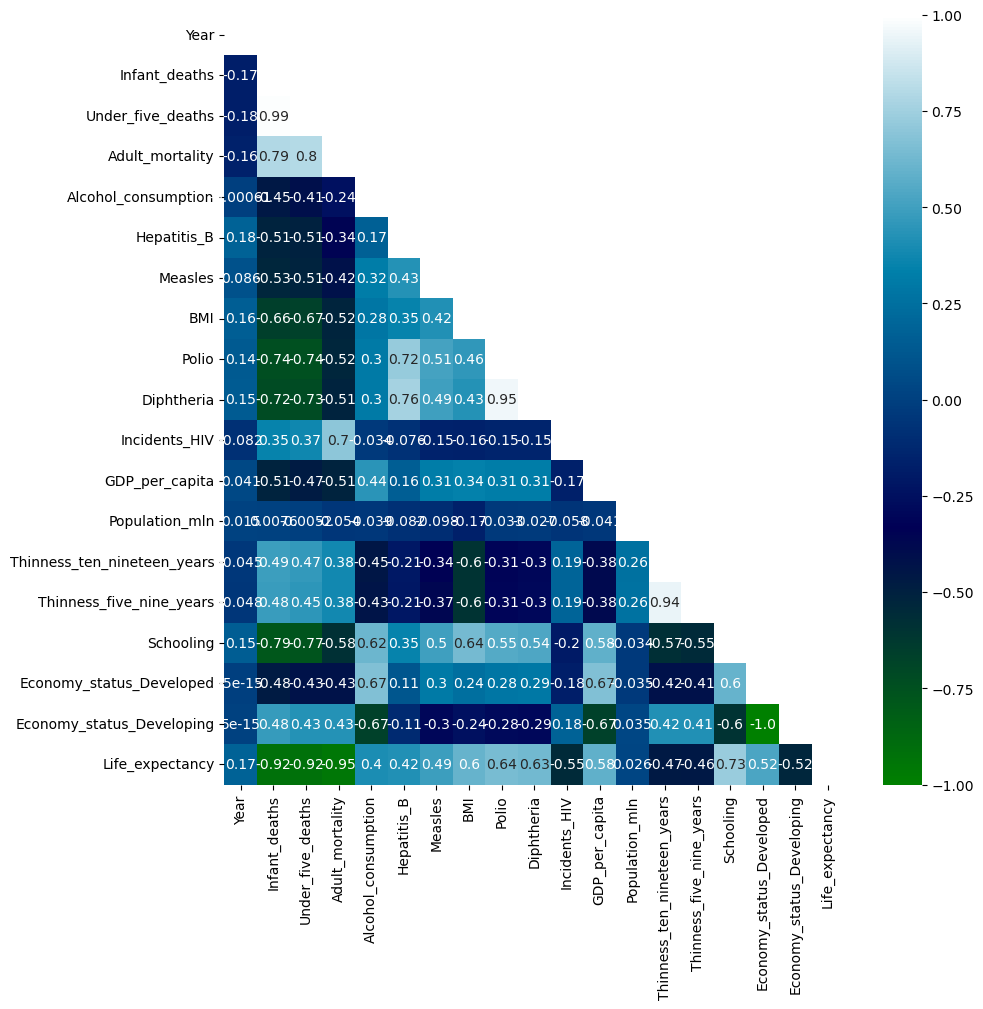

In [ ]:
# plot a heatmap to visualise correlation
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(numeric_only=True),
            annot = True,
           vmin=-1,
           vmax=+1,
           cmap='ocean',
           fmt='.2',
           mask=np.triu(df.corr(numeric_only=True)))

plt.show()

**Findings from the correlations heatmap**

> **Actions to take:**    
        Further checks on the below will need to be made.

**The following features have *p > 0.4:***
 * Alcohol_consumption
 * Hepatitis_B
 * Measles
 * BMI
 * Polio
 * Diptheria
 * GDP_per_capita
 * Schooling
 * Economy_status_Developed

**The following features have *p < -0.4:***

* Infant_deaths
* Under_five_deaths
* Adult_mortality
* Economy_status_Developing
* Thinness_ten_nineteen_years
* Thinness_five_nine_years
* Incidents_HIV


### Patterns and Outliers

**Findings from pattern detection**

>**Actions to take:**    
> Consider the below columns for our model.   
      **NB!** Schooling and GDP have a strong linear relationship - consider using only one   
      **NB!** Polio and Diptheria have a strong linear relationship - consider using only one

The following columns seem to have a significant relationship with Life Expectancy:

**Positive:**
* GDP_per_capita - exponential initially, linear once .log() applied
* Schooling - linear
* BMI - linear
* High vaccination rates for Hepatitis, Polio, Diphtheria seem to correlate with higher life expectancy - but no linearity!

**Negative:**
* Infant_deaths - linear
* Under_five_deaths - linear
* Adult_mortality - linear


#### Visualising relationships with Life Expectancy

In [ ]:
# set the colour for pairplots
sns.set_palette(palette = 'CMRmap')

##### 1. Socio-economic

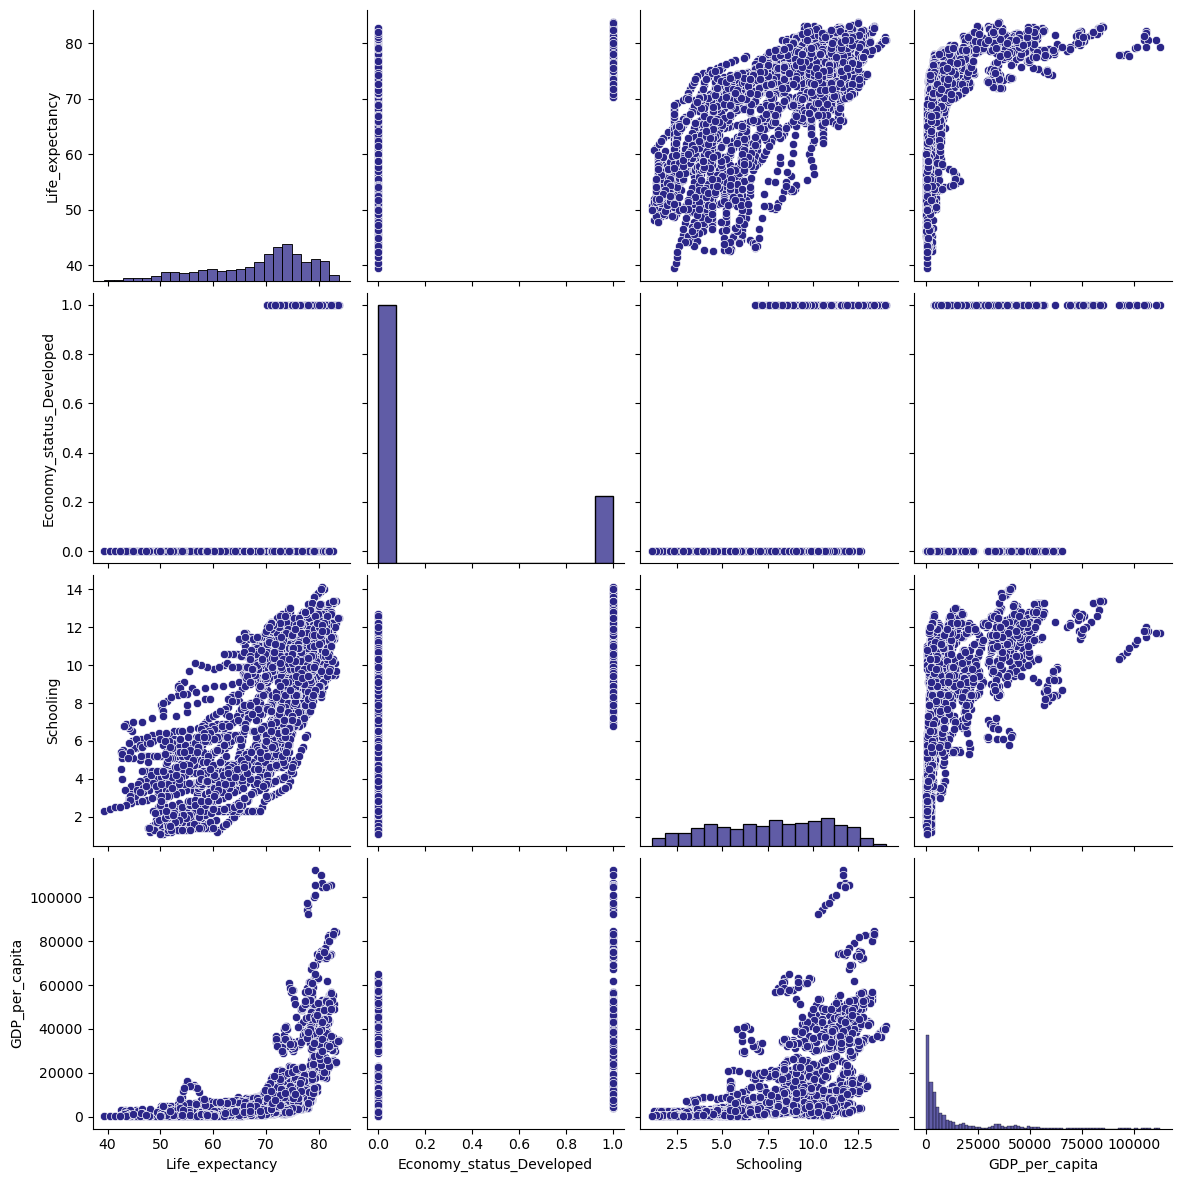

In [ ]:
# plot relationships between the columns - grouped as socio-economic
sns.pairplot(df[['Life_expectancy', 'Economy_status_Developed','Schooling', 'GDP_per_capita']], height = 3)
plt.show()

In [ ]:
# create .log() version for GDP_per_capita
df['GDP_per_capita_log'] = np.log(df['GDP_per_capita'])

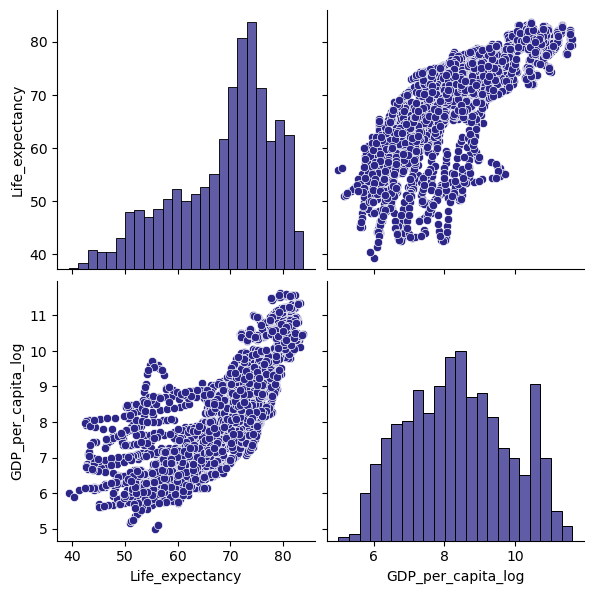

In [ ]:
# plot relationships between 'GDP_per_capita_log' and 'Life_expectancy'
sns.pairplot(df[['Life_expectancy', 'GDP_per_capita_log']], height = 3)
plt.show()

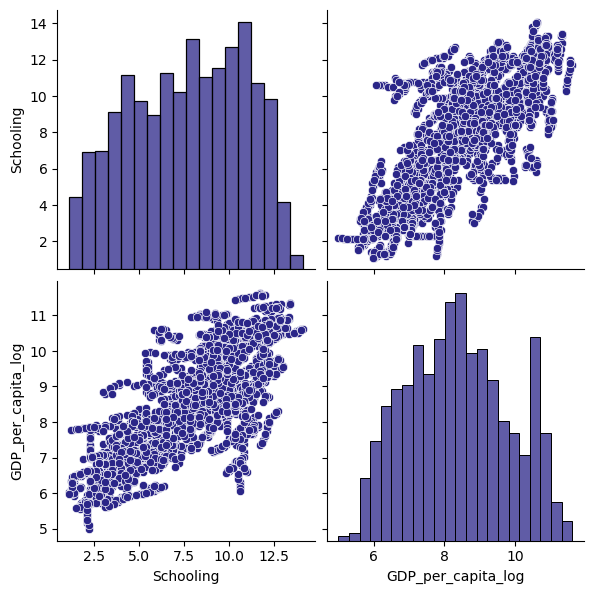

In [ ]:
# plot relationships between 'Schooling' and 'GDP_per_capita_log'
sns.pairplot(df[['Schooling', 'GDP_per_capita_log']], height = 3)
plt.show()

##### 2. Mortality

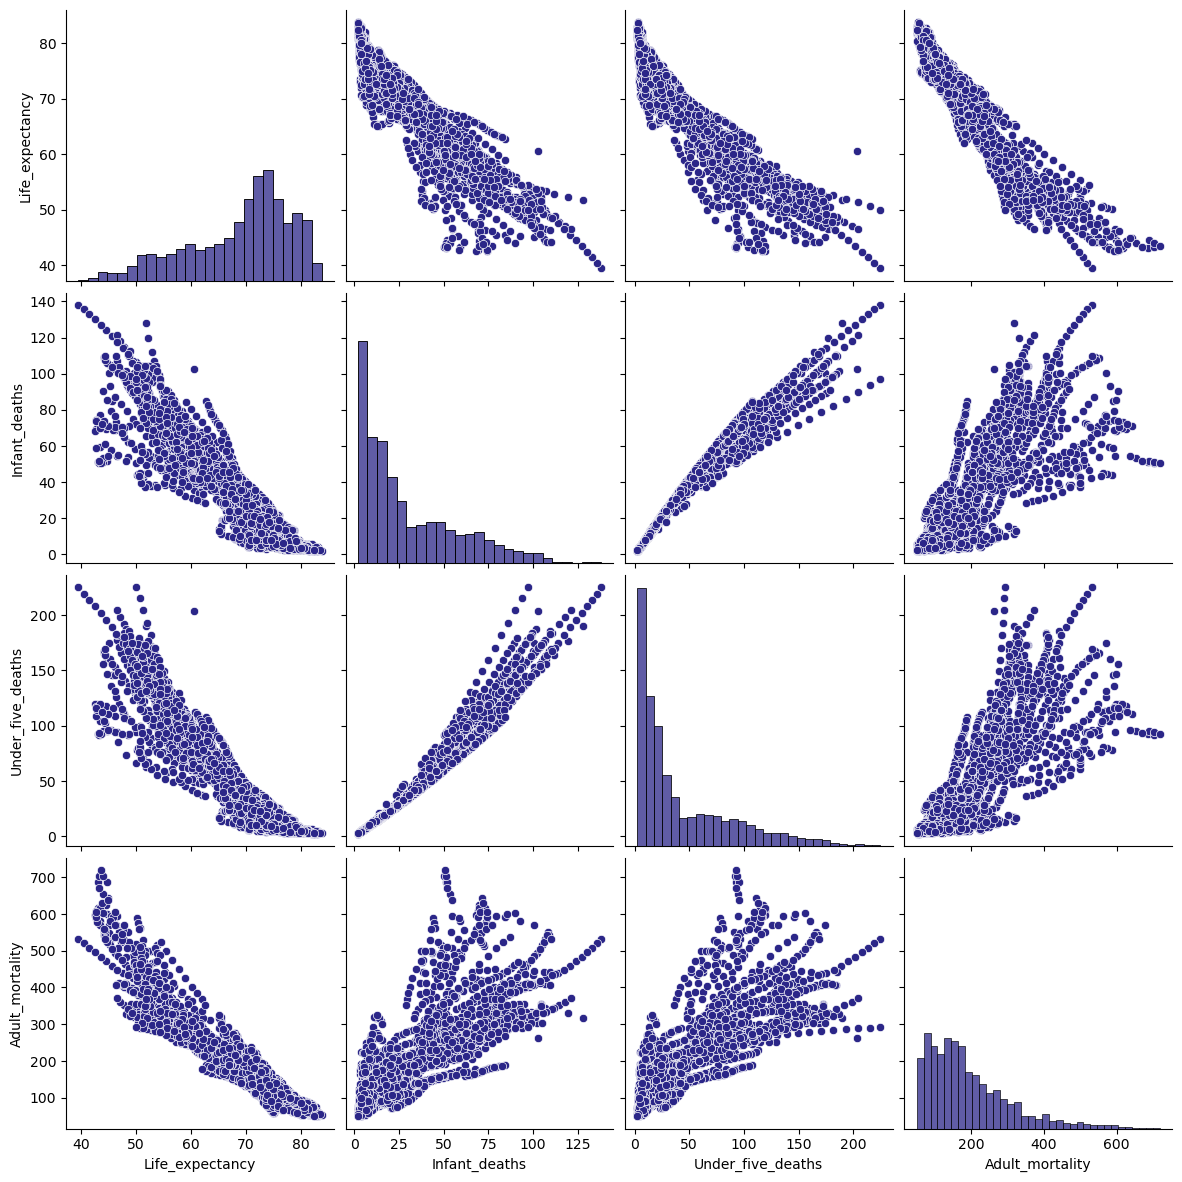

In [ ]:
# plot relationships between the columns - grouped as mortality
sns.pairplot(df[['Life_expectancy', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality']], height = 3)
plt.show()

##### 3. Body mass

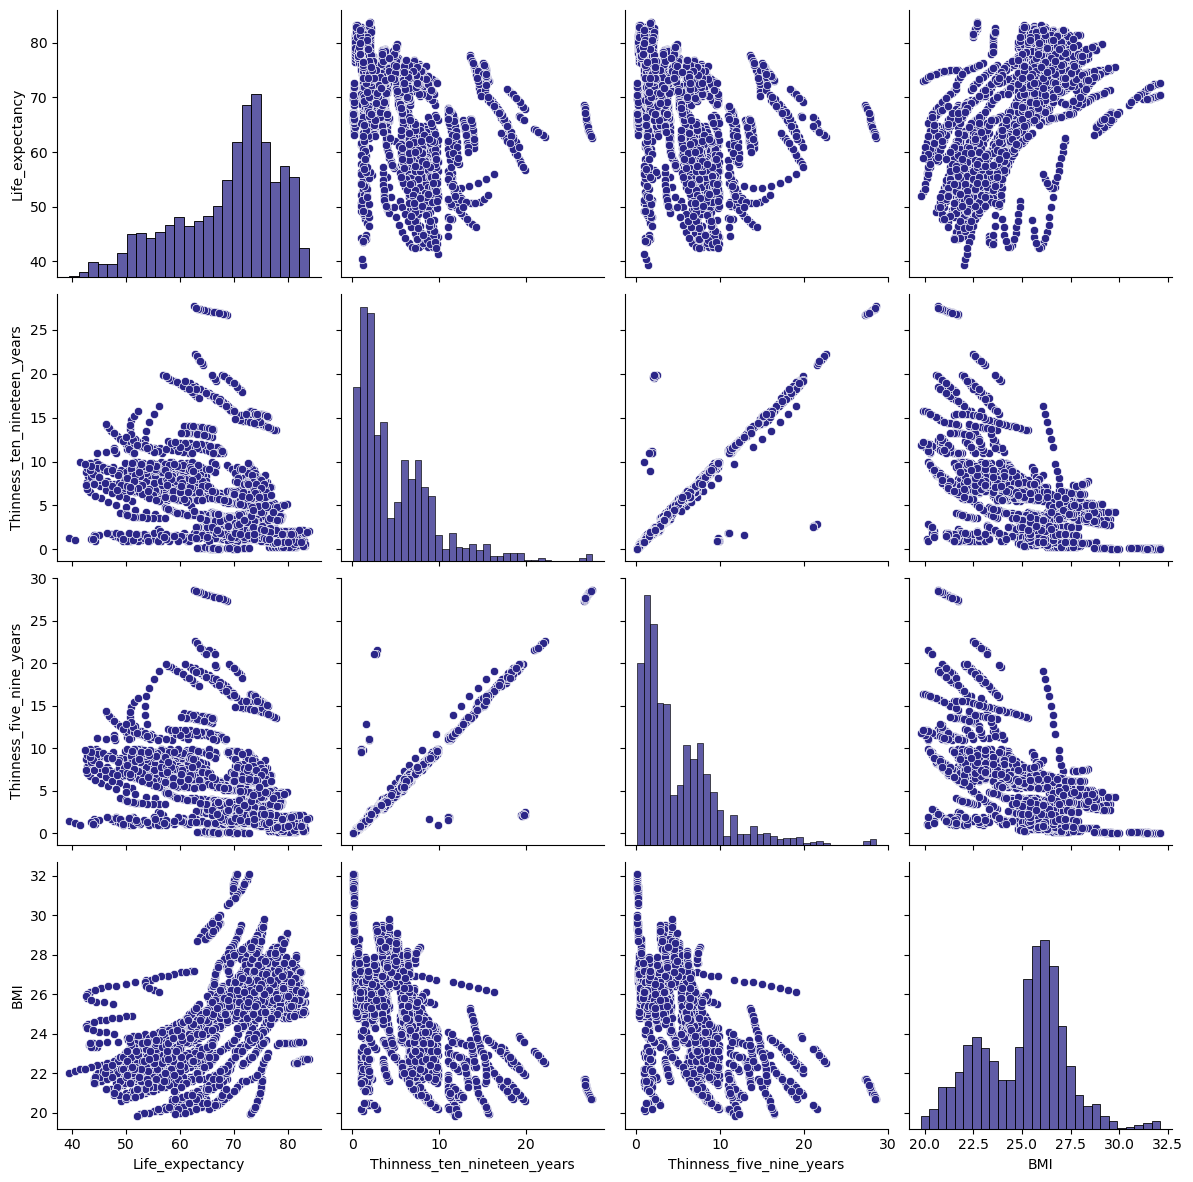

In [ ]:
# plot relationships between columns - grouped as weight
sns.pairplot(df[['Life_expectancy', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'BMI']], height = 3)
plt.show()

##### 4. Health

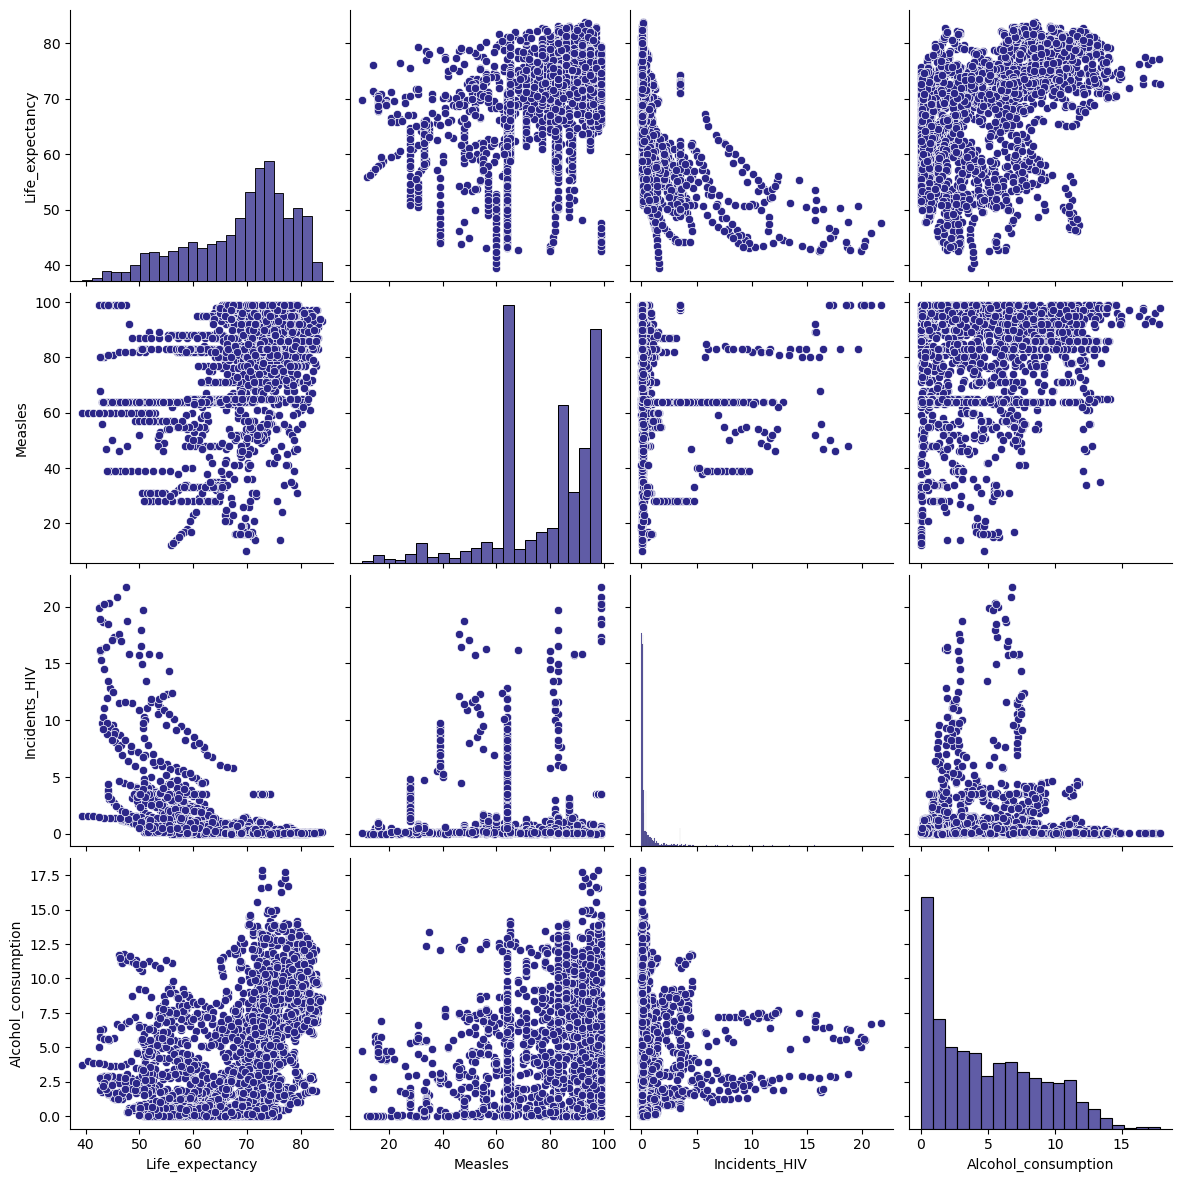

In [ ]:
# plot relationships between the columns - grouped as health
sns.pairplot(df[['Life_expectancy', 'Measles', 'Incidents_HIV', 'Alcohol_consumption']], height = 3)
plt.show()

In [ ]:
# create .log() version for 'Incidents_HIV'
df['Incidents_HIV_log'] = np.log(df['Incidents_HIV'])

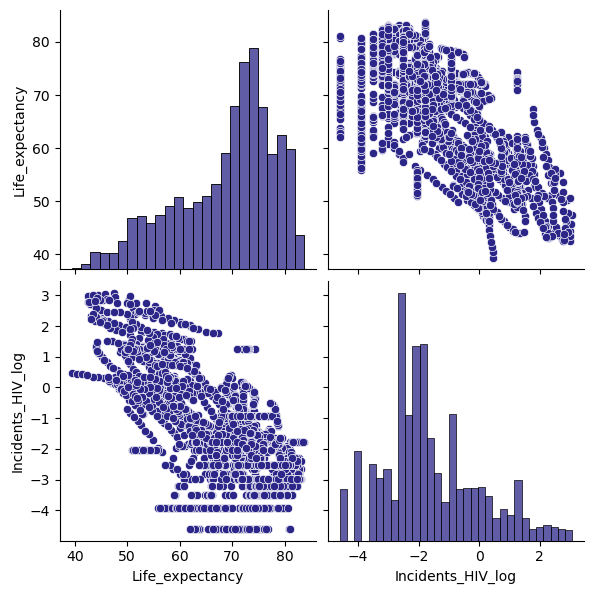

In [ ]:
# plot relationships between 'Incidents_HIV' and 'Life_expectancy'
sns.pairplot(df[['Life_expectancy', 'Incidents_HIV_log']], height = 3)
plt.show()

##### 5. Preventative health - vaccinations

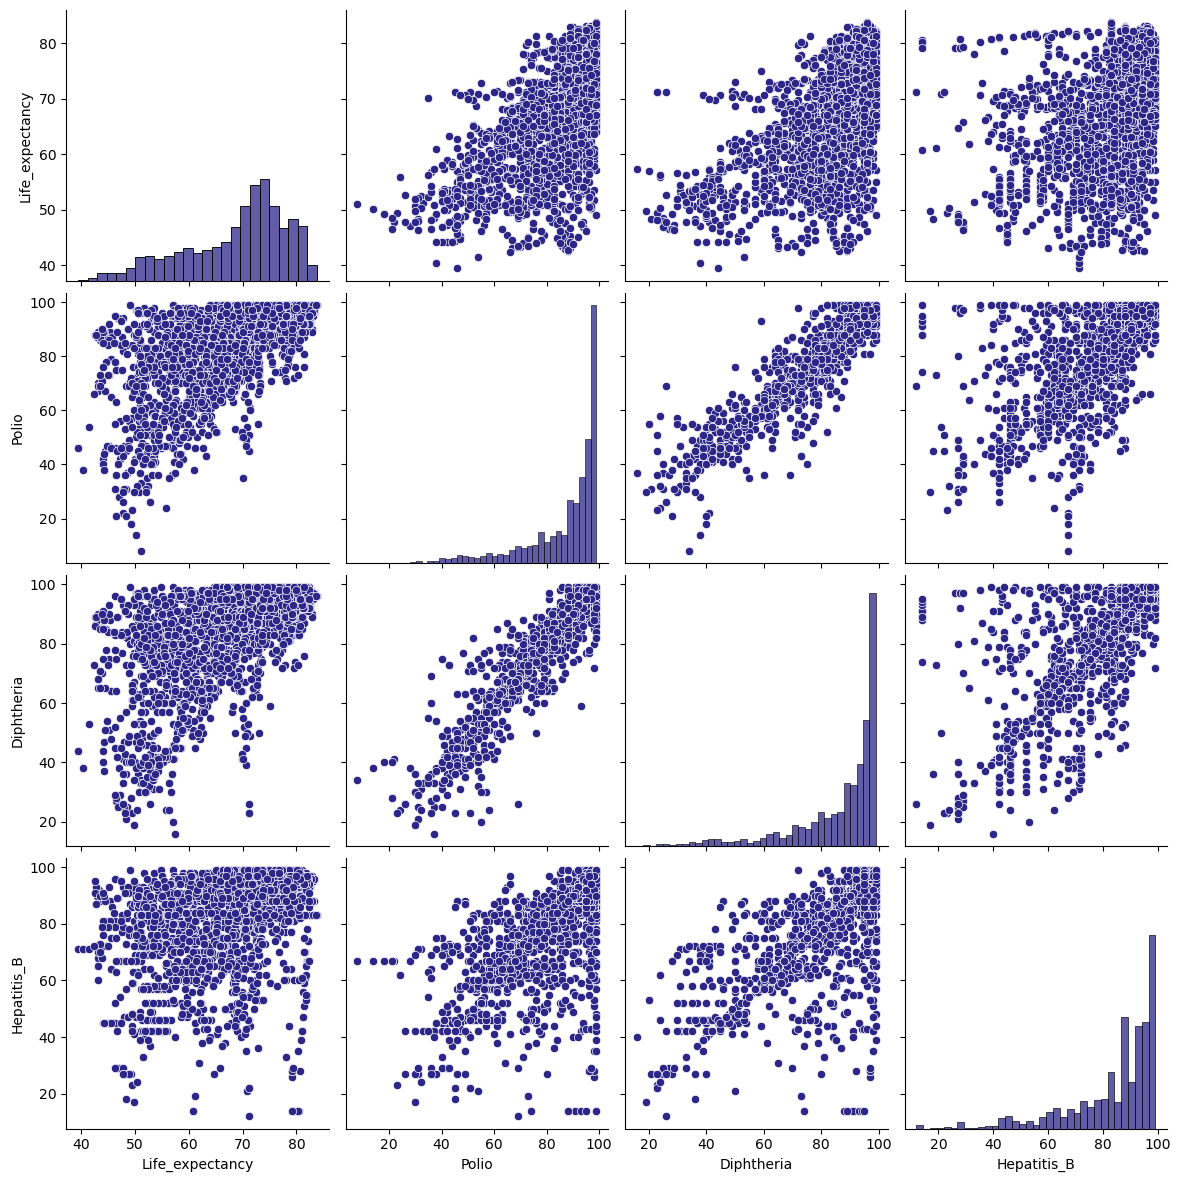

In [ ]:
# plot relationships between the columns - grouped as vaccinations
sns.pairplot(df[['Life_expectancy', 'Polio', 'Diphtheria','Hepatitis_B']], height = 3)
plt.show()

**Findings from outlier detection**

> **Actions to take:**   
> None, no outliers to remove


**Alcohol_consumption** - two outliers over 17.5, both for Estonia, verified against the average consumption for the country

> Estonia average - 15.1   
    
**BMI** - 16 outliers over 31.6, these belong to the same countries in the same region indicating that this is the norm for them, verified against the average
> Samoa average - 31.2625   
> Tonga average - 31.6875

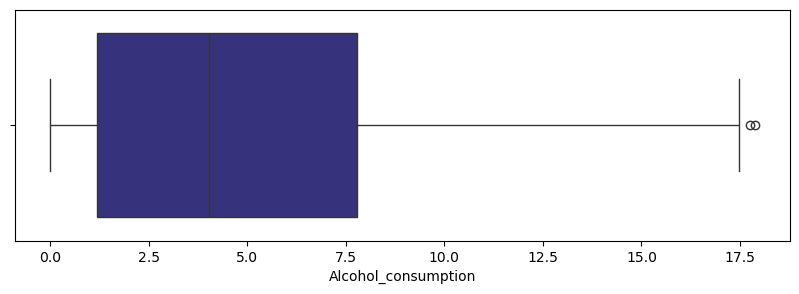

In [ ]:
# check 'Alcohol_consumption' for outliers
plt.figure(figsize = (10, 3))
sns.boxplot(data = df['Alcohol_consumption'],
            orient = 'h')

plt.show()

In [ ]:
# find the outliers in the 'Alcohol_consumption'
df[df['Alcohol_consumption'] >= 17.5].sort_values(by=['Country'])

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP_per_capita_log,Incidents_HIV_log
1688,Estonia,European Union,2013,2.8,3.6,118.1710,17.75,93,92,26.3,94,94,0.08,16553,1.32,1.9,1.9,12.6,1,0,77.1,9.714323,-2.525729
2481,Estonia,European Union,2006,5.2,6.6,184.2685,17.87,95,98,25.9,95,95,0.08,16155,1.35,2.1,2.2,12.2,1,0,72.7,9.689985,-2.525729


In [ ]:
# check the average 'Alcohol_consumption' for Estonia
print(f'The average alcohol consumption in Estonia is {df[df['Country'] == 'Estonia']['Alcohol_consumption'].mean()} litres')

The average alcohol consumption in Estonia is 15.1 litres


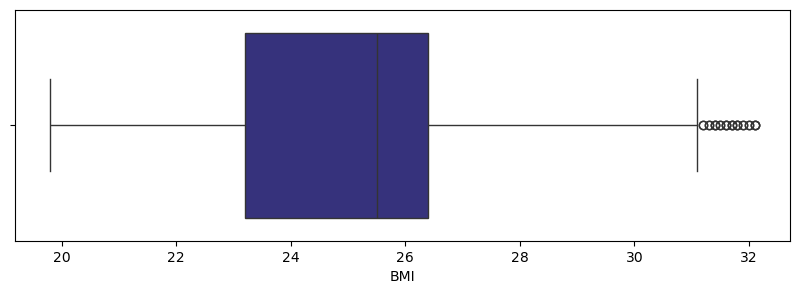

In [ ]:
# check 'BMI' for outliers
plt.figure(figsize = (10, 3))
sns.boxplot(data = df['BMI'],
            orient = 'h')

plt.show()

In [ ]:
#check which countries are the potential outliers for 'BMI'
df[df['BMI'] >= 31.6].sort_values(by=['Country'])

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP_per_capita_log,Incidents_HIV_log
233,Samoa,Oceania,2013,16.2,18.9,117.1050,1.84,60,74,31.8,81,67,0.17,3961,0.19,0.2,0.1,10.3,0,1,72.4,8.284252,-1.771957
969,Samoa,Oceania,2012,16.4,19.1,119.6830,2.10,64,52,31.7,82,64,0.17,4012,0.19,0.2,0.1,10.2,0,1,72.1,8.297045,-1.771957
1782,Samoa,Oceania,2014,16.1,18.7,114.5270,2.05,56,68,32.0,76,63,0.17,3932,0.19,0.2,0.1,10.3,0,1,72.5,8.276903,-1.771957
2246,Samoa,Oceania,2011,16.5,19.2,124.3700,2.10,58,50,31.6,79,65,0.17,4219,0.19,0.2,0.1,10.2,0,1,71.9,8.347353,-1.771957
2679,Samoa,Oceania,2015,15.9,18.6,111.9490,2.10,59,55,32.1,78,66,0.17,4074,0.19,0.2,0.1,10.3,0,1,72.7,8.312381,-1.771957
283,Tonga,Oceania,2014,10.8,12.5,135.6630,0.28,98,92,32.1,98,80,0.17,4276,0.10,0.1,0.1,11.1,0,1,70.4,8.360773,-1.771957
577,Tonga,Oceania,2007,12.0,14.0,147.0750,2.05,87,99,31.7,99,87,0.17,3817,0.10,0.1,0.1,9.8,0,1,69.9,8.247220,-1.771957
680,Tonga,Oceania,2008,11.8,13.7,145.4525,1.10,84,98,31.7,99,86,0.17,3967,0.10,0.1,0.1,10.1,0,1,69.9,8.285765,-1.771957
723,Tonga,Oceania,2011,11.1,12.9,140.5855,0.93,82,99,31.9,99,82,0.17,4043,0.10,0.1,0.1,10.9,0,1,70.1,8.304742,-1.771957
1500,Tonga,Oceania,2012,11.0,12.8,138.9635,0.22,77,95,31.9,95,77,0.17,4108,0.10,0.1,0.1,10.9,0,1,70.2,8.320692,-1.771957


In [ ]:
#check the average 'BMI' for Samoa
print(f'The average BMI for Samoa is {df[df['Country'] == 'Samoa']['BMI'].mean()}')

The average BMI for Samoa is 31.2625


In [ ]:
#check the average 'BMI' for Tonga
print(f'The average BMI for Tonga is {df[df['Country'] == 'Tonga']['BMI'].mean()}')

The average BMI for Tonga is 31.6875


### Non-numerical data - regions and countries

**NB!** Regions listed in the dataset and on WHO website differ.    
9 regions in the dataset, 6 listed on the website.

In [ ]:
# check the average life expectancy by country
df.groupby('Country')[['Life_expectancy']].mean().sort_values('Life_expectancy', ascending = False)

,Life_expectancy
Country,
Japan,82.45625
Switzerland,81.67500
Iceland,81.57500
Italy,81.38750
Australia,81.11250
...,...
Zimbabwe,48.66250
Sierra Leone,46.70000
Eswatini,46.69375


In [ ]:
# check the average life expectancy by region
expectancy_by_region = df.groupby('Region')[['Life_expectancy']].mean().round(2).sort_values('Life_expectancy', ascending = False)
expectancy_by_region

,Life_expectancy
Region,
North America,77.84
European Union,77.72
Rest of Europe,74.53
Middle East,73.98
South America,72.78
Central America and Caribbean,72.44
Oceania,69.52
Asia,69.45
Africa,57.85


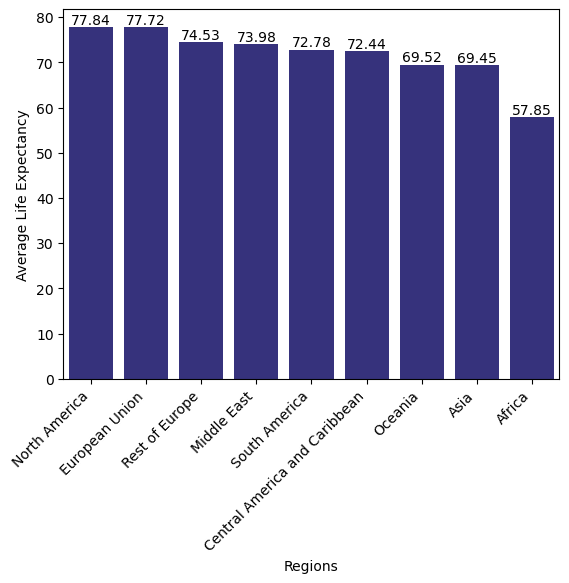

In [ ]:
# show average life expectancy by region
ax = sns.barplot(data=expectancy_by_region, x = 'Region', y = 'Life_expectancy')
plt.xticks(rotation=45, horizontalalignment = 'right')
ax.bar_label(ax.containers[0])
plt.xlabel('Regions')
plt.ylabel('Average Life Expectancy')
plt.show()

In [ ]:
# check the number of countries per region
country_by_region = df.groupby('Region')['Country'].nunique().sort_values(ascending=False)
country_by_region

Region
Africa                           51
Asia                             27
European Union                   27
Central America and Caribbean    19
Rest of Europe                   15
Middle East                      14
South America                    12
Oceania                          11
North America                     3
Name: Country, dtype: int64

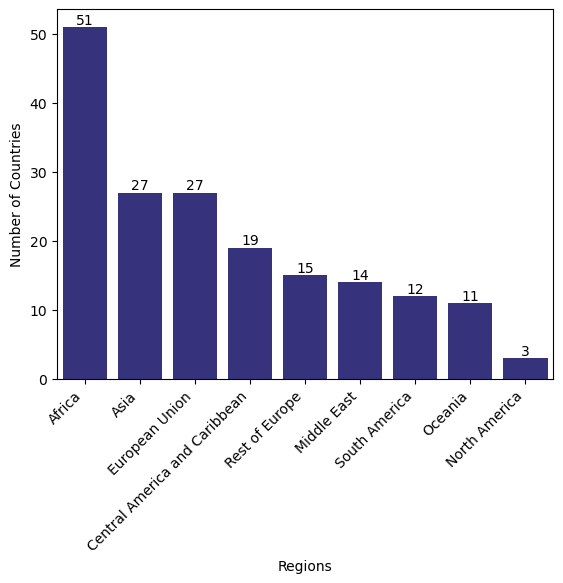

In [ ]:
# show the number of countries per region
ax = sns.barplot(data=country_by_region)
plt.xticks(rotation=45, horizontalalignment = 'right')
ax.bar_label(ax.containers[0])
plt.xlabel('Regions')
plt.ylabel('Number of Countries')
plt.show()

In [ ]:
# check the number of records by region
record_count = df.groupby('Region')[['Country']].count()
record_count = record_count.sort_values(by = 'Country', ascending = False)
record_count

,Country
Region,
Africa,816
Asia,432
European Union,432
Central America and Caribbean,304
Rest of Europe,240
Middle East,224
South America,192
Oceania,176
North America,48


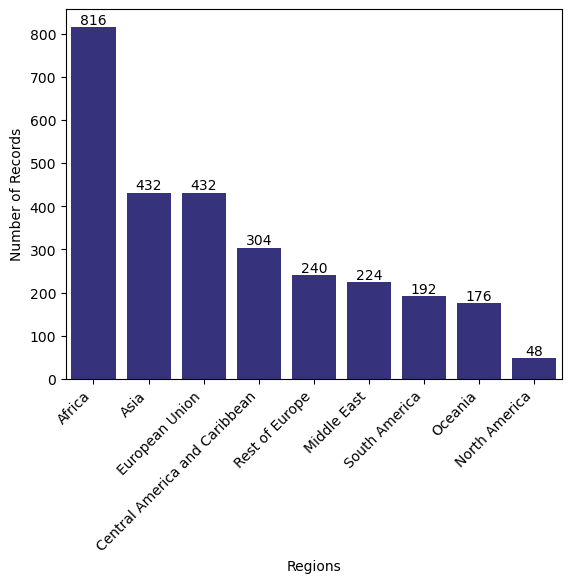

In [ ]:
# show the number of records from each region
ax = sns.barplot(data=record_count, x = 'Region', y = 'Country')
plt.xticks(rotation=45, horizontalalignment = 'right')
ax.bar_label(ax.containers[0])
plt.xlabel('Regions')
plt.ylabel('Number of Records')
plt.show()

### Conclusion

**Based on the EDA above, the following columns should be considered for the next stage.**    
The ones in *italics* were exponential initially, then showed a linear relationship when .log() applied.

- Regions
- BMI
- *GDP_per_capita*
- Schooling
- Economy_status_Developed **OR** Economy_status_Developing
- Infant_deaths
- Under_five_deaths
- Adult_mortality

- *Incidents_HIV*
